## Regression

**Skit-Learn** provides many kinds of types **Regression**, you can refer more detail from [this](http://scikit-learn.org/stable/modules/linear_model.html). 

In this part, we will demonstrate the most common regression. 

 1. ***`SGDRegressor`***(training by Stochastic Gradient descent)
 2. ***`LinearRegression`***(training by Ordinary least square)
 3. ***`Lasso Regreession`*** 
 4. ***`Ridge Regression`***
 5. ***`Elastic Net`***(combine Lasso and Ridge Regression)
 
We will use Boston dataset as an example to demonstrate how to build linear regression by skit-learn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

### Load data from sklearn datasets

In [2]:
boston = datasets.load_boston()
print(boston.keys())
x = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
y = pd.DataFrame(data = boston['target'], columns = ['target'])

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [3]:
# description of boston dataset
#print(boston['DESCR'])

### Variable CHAS need to transform to dummy

In [4]:
CHAS_dummy = pd.get_dummies(data = x['CHAS'], prefix = "CHAS")
df_x = pd.concat([x.drop(columns = 'CHAS'), CHAS_dummy], axis = 1)

### Split data to training part and testing part

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.3)
x_train.head(3)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_0.0,CHAS_1.0
499,0.17783,0.0,9.69,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,1,0
118,0.13058,0.0,10.01,0.547,5.872,73.1,2.4775,6.0,432.0,17.8,338.63,15.37,1,0
71,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,1,0


### Feature Standardization

In [6]:
sc = StandardScaler()
sc.fit(x_train)
x_train_normalized = sc.fit_transform(x_train)
x_test_normalized = sc.fit_transform(x_test)

In [7]:
# y_train and y_test need to transform to 1d np.array

y_train_trans = y_train['target'].values # pd.DataFrame -> pd.Series -> np.arry
y_test_trans = y_test['target'].values

### 1. SGDRegression 
### [參數說明:](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor)

 - loss (定義使用的損失函數)
 - penalty (定義使用的懲罰項，sklearn中常用的懲罰項有L1、L2 和 Elastic Net Regularization)
     - L1 Regularization(Lasso)
         - $L(w) = \sum_{i=1}^{n}(\hat{y}^{i} - y^{i})^2\ +\ \alpha\sum_{j = 1}^{m}(w_{j}^{2})$
     - L2 Regularization(Ridge Regression)
         - $L(w) = \sum_{i=1}^{n}(\hat{y}^{i} - y^{i})^2\ +\ \alpha\sum_{j = 1}^{m}\vert{w_{j}}\vert$
     - Elastic Net
         - combine L1 & L2 Regularization
 - learning_rate:
     - "constant" 
         - 每次更新的步伐固定 eta = eta0  
     - "optimal" eta = 1/(alpha*(t - t0))
         - 每次更新的步伐，隨著每次參數更新而變
     - "invscaling" eta = eta0/pow(t, power_t)
         - adaptive learning，learning rate 隨著參數更新次數愈多，learning rate 越變越小
 - eta0 ( $w^t = w^{t-1} - \eta \frac{\partial L}{\partial w}$ 中的 $\eta$，每次更新參數的速度 )
 - alpha (懲罰項中的$\alpha$值)
 
 ***Note: When you adding the `l1 norm`, `L2 norm` or `Elastic Net`to the SGDRegressor, it means to use the `Lasso`,`Ridge` or `Elastic Net` Regression.***

In [8]:
sgdreg = linear_model.SGDRegressor(loss = 'squared_loss', learning_rate = 'constant', max_iter = 10000,   
                                   penalty = None, fit_intercept = True)
sgdreg.fit(X = x_train_normalized, y = y_train_trans)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [9]:
prediction = sgdreg.predict(x_test_normalized)
mean_square_error = np.mean((prediction - y_test_trans)**2)
R_square = sgdreg.score(X = x_test_normalized, y = y_test_trans)

In [10]:
print('cofficient:', sgdreg.coef_)
print("-"*50)
print('MSE: %.5f' % (mean_square_error))
print('-'*50)
print('R Square: %.3f' % (R_square))

cofficient: [-1.02583437  1.61267897 -0.17646948 -2.63108312  1.24952305  0.38269305
 -2.78749064  2.74159273 -2.18162305 -2.11554888  0.63110483 -4.53287085
  0.05830512 -0.05830512]
--------------------------------------------------
MSE: 22.58331
--------------------------------------------------
R Square: 0.723


### 2. LinearRegerssion

### [參數說明:](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
   - fit_intercept:是否要配適截距項
   - normalize : 
       - This parameter is ignored when `fit_intercept` is set to False. 
   If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. 
   If you wish to standardize, please use `sklearn.preprocessing.StandardScaler` before calling fit on an estimator with `normalize = False`.
   - n_job: 設定電腦運算的方式，面對資料量大時，可進行調整，進而增加運算速度

In [11]:
lr = linear_model.LinearRegression(fit_intercept = True)
lr.fit(X = x_train_normalized, y = y_train_trans)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
prediction = lr.predict(x_test_normalized)
mean_square_error = np.mean((prediction - y_test_trans)**2)
R_square = lr.score(X = x_test_normalized, y = y_test_trans)

In [13]:
print('cofficient:', lr.coef_)
print("-"*50)
print('MSE: %.5f' % (mean_square_error))
print("-"*50)
print("R Square: %.3f" % (R_square))

cofficient: [-0.87866731  1.27987081  0.05846519 -2.4224962   2.08398812  0.59129764
 -3.35789606  2.82976643 -1.87418936 -2.18158326  0.84980651 -4.5239082
 -0.30175342  0.30175342]
--------------------------------------------------
MSE: 18.67825
--------------------------------------------------
R Square: 0.771


### 3. Lasso Regression
### [參數說明：](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)
   - normalize 與 LinearRegression中的normalize相同
   - alpha
       - $L(w) = \sum_{i=1}^{n}(\hat{y}^{i} - y^{i})^2\ +\ \alpha\sum_{j = 1}^{m}\vert{w_{j}}\vert$ 中的$\alpha$


In [16]:
lasso = linear_model.Lasso(alpha = 2, fit_intercept = True)
lasso.fit(X = x_train_normalized, y = y_train_trans)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
prediction = lasso.predict(X = x_test_normalized)
mean_square_error = np.mean((prediction - y_test_trans)**2)
R_square = lasso.score(X = x_test_normalized, y = y_test_trans)

In [22]:
print('cofficient:', lasso.coef_)
print("-"*50)
print('MSE: %.5f' % (mean_square_error))
print("-"*50)
print("R Square: %.3f" % (R_square))

cofficient: [-0.          0.         -0.         -0.          1.59820553 -0.
  0.         -0.         -0.         -0.62658303  0.         -3.66713036
 -0.          0.        ]
--------------------------------------------------
MSE: 30.88952
--------------------------------------------------
R Square: 0.622


### 4. Ridge  Regression

### [參數說明：](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)
   - normalize 與 LinearRegression中的normalize相同
    
   - alpha 
       - $L(w) = \sum_{i=1}^{n}(\hat{y}^{i} - y^{i})^2\ +\ \alpha\sum_{j = 1}^{m}(w_{j}^{2})$ 中的 $\alpha$

In [27]:
ridge = linear_model.Ridge(alpha = 2, fit_intercept = True)
ridge.fit(X = x_train_normalized, y = y_train_trans)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
prediction = ridge.predict(X = x_test_normalized)
mean_square_error = np.mean((prediction - y_test_trans)**2)
R_square = ridge.score(X = x_test_normalized, y = y_test_trans)

In [29]:
print('cofficient:', ridge.coef_)
print("-"*50)
print('MSE: %.5f' % (mean_square_error))
print("-"*50)
print("R Square: %.3f" % (R_square))

cofficient: [-8.60958857e-01  1.23831264e+00 -3.36695239e-03 -2.32542762e+00
  2.11749183e+00  5.53029174e-01 -3.27506220e+00  2.64088348e+00
 -1.70996880e+00 -2.14922759e+00  8.50269224e-01 -4.46703763e+00
 -3.07010123e-01  3.07010123e-01]
--------------------------------------------------
MSE: 18.50375
--------------------------------------------------
R Square: 0.773


### 5. Elastic Net
   - ElasticNet is a linear regression model trained with L1 and L2 prior as regularizer. 
   - Minimizes the objective function:
       - $J(w) = \frac{1}{2n_samples}\parallel y - x_{w}\parallel^2 + \alpha\times$ (L1_ratio) $\times \vert w\vert + 0.5 \times\alpha\times$ (1-L1_ratio)$(w)^2$

### [參數說明：](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)
   - alpha (objective function 中的 $\alpha$)
   - l1_ratio (The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1)
       - l1_ratio = 0 the penalty is an L2 penalty.
       - l1_ration = 1 the penalty is an L1 penalty.
       - For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
   - warm_start (If true, 則使用上次訓練的模型，這次訓練模型參數初始值)
   - tol (The tolerance for the optimization)

In [36]:
elsnet = linear_model.ElasticNet(alpha = 2, l1_ratio = 0.5, fit_intercept = True)
elsnet.fit(X = x_train_normalized, y = y_train_trans)

ElasticNet(alpha=2, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [37]:
prediction = elsnet.predict(X = x_test_normalized)
mean_square_error = np.mean((prediction - y_test_trans)**2)
R_square = elsnet.score(X = x_test_normalized, y = y_test_trans)

In [38]:
print('cofficient:', elsnet.coef_)
print("-"*50)
print('MSE: %.5f' % (mean_square_error))
print("-"*50)
print("R Square: %.3f" % (R_square))

cofficient: [-0.25943913  0.16460968 -0.28433635 -0.23663797  1.55357359 -0.
  0.         -0.         -0.34199462 -0.89738463  0.28296197 -1.87742021
 -0.06217922  0.06217586]
--------------------------------------------------
MSE: 33.08746
--------------------------------------------------
R Square: 0.595


### Visualize the Regression Model

In [39]:
# only take one variable as x
boston = datasets.load_boston()
print(boston.keys())
x = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
y = pd.DataFrame(data = boston['target'], columns = ['MEDV'])
boston_df = pd.concat([x, y], axis = 1)
boston_df.head(3)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


### Correlation Analysis

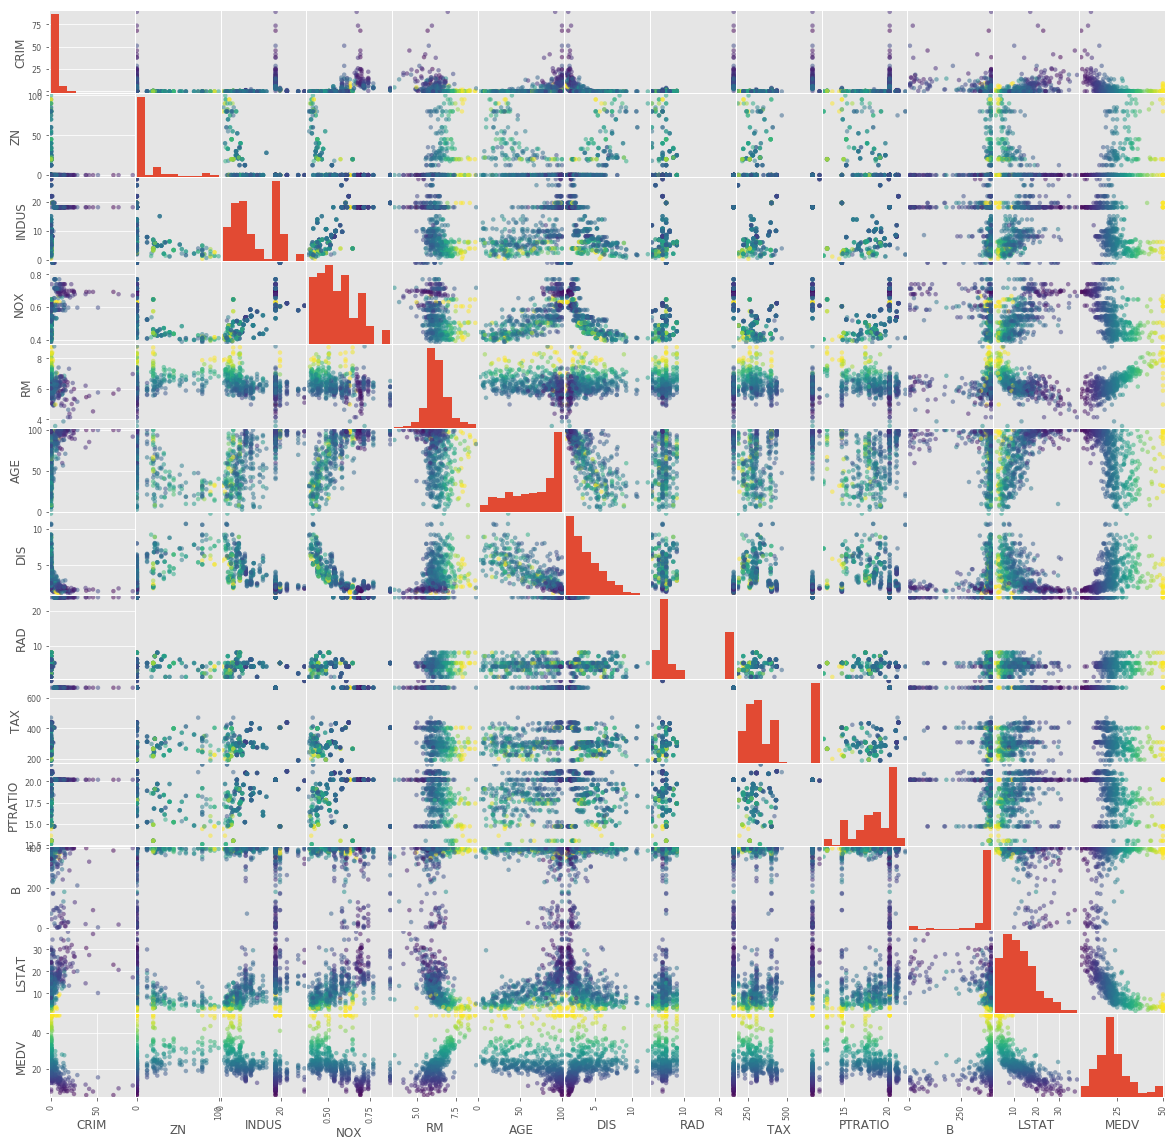

In [40]:
plt.style.use('ggplot') 
plot_ax = pd.plotting.scatter_matrix(frame = boston_df.drop(columns = ['CHAS']), 
                                     figsize = (20, 20), c = boston_df['MEDV'], s = 80)
plt.show()

In [41]:
import seaborn as sns

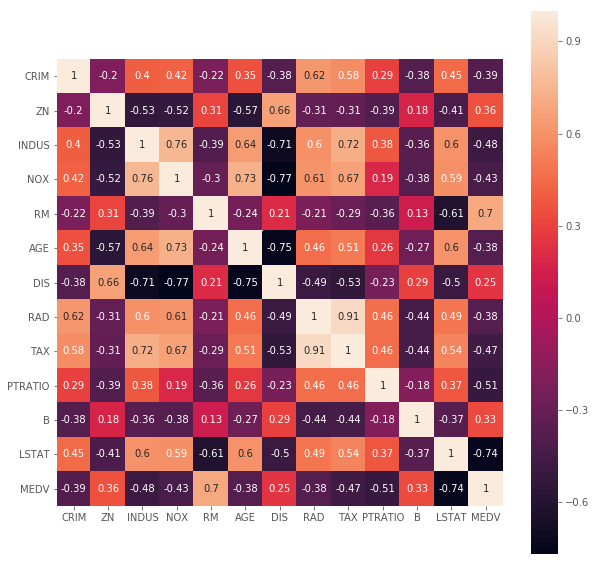

In [42]:
# visualize correlation by heat map
corr_matrix = boston_df.drop(columns = ['CHAS']).corr()
plt.figure(figsize = (10, 10))
sns.heatmap(data = corr_matrix, annot =  True, square = True)
plt.show()

#### Only take variable `RM` as variable X to predict Y.

#### Variable `RM` have a higher positive correlation with y than the other variables. So it can easily to visualize the fitting model.

In [43]:
x = boston_df[['RM']]
y = boston_df['MEDV'].values

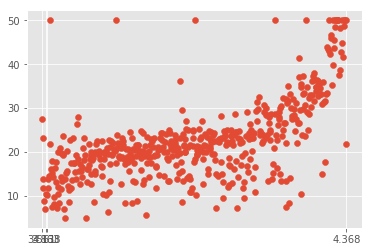

In [44]:
plt.figure()
plt.scatter(x, y)
plt.xticks(np.linspace(start = x.min(), stop = x.max(), num = 4))
plt.show()

In [45]:
sc = StandardScaler()
sc.fit(x)
x_sc = sc.transform(x)

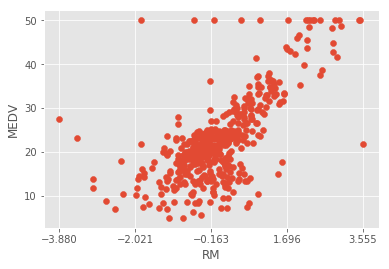

In [46]:
plt.figure()
plt.scatter(x_sc, y)
plt.xticks(np.linspace(start = x_sc.min(), stop = x_sc.max(), num = 5))
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size = 0.2)

### SGDRegressor

In [48]:
sgdreg = linear_model.SGDRegressor(loss = 'squared_loss', penalty = None, max_iter = 1000, eta0 = 0.001,
                                   learning_rate = 'optimal', fit_intercept = True)
sgdreg.fit(X = x_train, y = y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.001,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [49]:
prediction = sgdreg.predict(x_test)
mean_square_error = np.mean((prediction - y_test)**2)
R_square = sgdreg.score(X = x_test, y = y_test)

In [50]:
print('cofficient:', sgdreg.coef_)
print("-"*50)
print('MSE: %.5f' % (mean_square_error))
print('-'*50)
print('R Square: %.3f' % (R_square))

cofficient: [6.59020757]
--------------------------------------------------
MSE: 44.90031
--------------------------------------------------
R Square: 0.544


### LinearRegression

In [58]:
lr = linear_model.LinearRegression(fit_intercept = True)
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
prediction = lr.predict(x_test)
mean_square_error = np.mean((prediction - y_test)**2)
R_square = lr.score(X = x_test, y = y_test)

print('cofficient:', sgdreg.coef_)
print("-"*50)
print('MSE: %.5f' % (mean_square_error))
print('-'*50)
print('R Square: %.3f' % (R_square))

cofficient: [6.59020757]
--------------------------------------------------
MSE: 45.49957
--------------------------------------------------
R Square: 0.538


### Lasso Regression

In [60]:
lasso = linear_model.Lasso(alpha = 2, fit_intercept = True)
lasso.fit(X = x_train, y = y_train)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
prediction = lasso.predict(x_test)
mean_square_error = np.mean((prediction - y_test)**2)
R_square = lr.score(X = x_test, y = y_test)

print('cofficient:', sgdreg.coef_)
print("-"*50)
print('MSE: %.5f' % (mean_square_error))
print('-'*50)
print('R Square: %.3f' % (R_square))

cofficient: [6.59020757]
--------------------------------------------------
MSE: 54.60714
--------------------------------------------------
R Square: 0.538


### Ridge Regression 

In [66]:
ridge = linear_model.Ridge(alpha = 2, fit_intercept = True)
ridge.fit(X = x_train, y = y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [67]:
prediction = ridge.predict(x_test)
mean_square_error = np.mean((prediction - y_test)**2)
R_square = lr.score(X = x_test, y = y_test)

print('cofficient:', sgdreg.coef_)
print("-"*50)
print('MSE: %.5f' % (mean_square_error))
print('-'*50)
print('R Square: %.3f' % (R_square))

cofficient: [6.59020757]
--------------------------------------------------
MSE: 45.56799
--------------------------------------------------
R Square: 0.538


### Elastic Net

In [70]:
elsnet = linear_model.ElasticNet(alpha = 2, fit_intercept = True)
elsnet.fit(X = x_train, y = y_train)

ElasticNet(alpha=2, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
prediction = elsnet.predict(x_test)
mean_square_error = np.mean((prediction - y_test)**2)
R_square = lr.score(X = x_test, y = y_test)

print('cofficient:', sgdreg.coef_)
print("-"*50)
print('MSE: %.5f' % (mean_square_error))
print('-'*50)
print('R Square: %.3f' % (R_square))

cofficient: [6.59020757]
--------------------------------------------------
MSE: 67.99679
--------------------------------------------------
R Square: 0.538


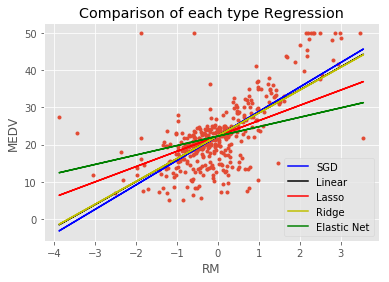

In [90]:
%matplotlib inline

fig = plt.figure()
plt.plot(x_train, y_train, '.')
plt.plot(x_train, sgdreg.predict(x_train), 'b-', label = 'SGD')
plt.plot(x_train, lr.predict(x_train), 'k-', label = 'Linear')
plt.plot(x_train, lasso.predict(x_train), 'r-', label = 'Lasso')
plt.plot(x_train, ridge.predict(x_train), 'y-', label = 'Ridge')
plt.plot(x_train, elsnet.predict(x_train), 'g-', label = 'Elastic Net')
plt.title('Comparison of each type Regression')
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.legend(loc = 'best')
plt.show()